In [15]:
from spiketimes.utils import p_adjust
from citalopram_project.load import get_data_dir, load_neurons
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style("ticks")

neurons = load_neurons()
neurons = neurons.loc[lambda x: x.group.isin(["sal", "continuation"])]
neurons = neurons[["session_name", "group"]].drop_duplicates()
df_stats = pd.read_parquet(get_data_dir() / "derived" / "spont_ensemble_stats.parquet.gzip")
df = df_stats.assign(pval_sig=lambda x: p_adjust(x.score_pval) < 0.05).merge(neurons, how="right")
df["group"] = df["group"].astype(str)
df["sig"] = (df["pval_sig"]) & (df["simmilarity"] > 0.1)


# df["sig"] = df["simmilarity"] > 0.1

<AxesSubplot:xlabel='group', ylabel='sig'>

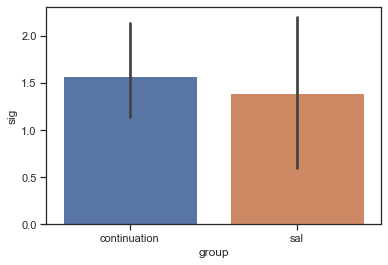

In [16]:
# num ensembles per recording
res = df.groupby(["group", "session_name"], as_index=False)["sig"].sum()
sns.barplot(data=res, x="group", y="sig")

<AxesSubplot:xlabel='group', ylabel='prop_in_ensemble'>

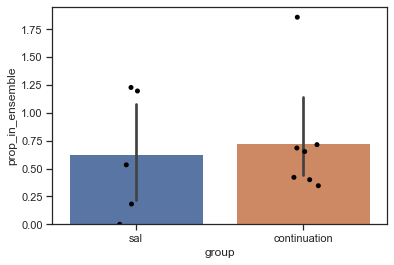

In [17]:
# Proportion neurons in ensembles
in_ensembles = (
    df
    .loc[lambda x: x.sig == True]
    .groupby("session_name", as_index=False)["size"].sum()
    .merge(df[["session_name", "group"]].drop_duplicates(), how="right")
    .fillna(0)
    .rename(columns = {"size": "ensemble_n"})
)

num_neurons = load_neurons().loc[lambda x: x.group.isin(["sal", "continuation"])].groupby("session_name", as_index=False).apply(len)
num_neurons = num_neurons.rename(columns={None: "total_n"})

res = in_ensembles.merge(num_neurons)
# res["prop"] = 
res["prop_in_ensemble"] = res["ensemble_n"].divide(res["total_n"])

sns.barplot(data=res, x="group", y="prop_in_ensemble")
sns.stripplot(data=res, x="group", y="prop_in_ensemble", color="black")

MannwhitneyuResult(statistic=9.0, pvalue=0.004314238796423539)

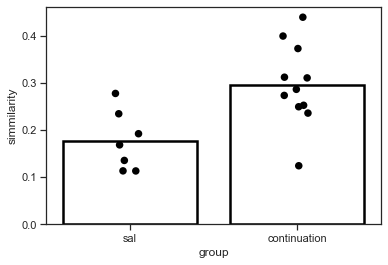

In [21]:
# simmilarity differences


res= df.fillna(0).loc[lambda x: x.sig == True]
sns.barplot(data=res, x="group", y="simmilarity", ci=None, edgecolor="black", fc="none", linewidth=2.5)

sns.stripplot(data=res, x="group", y="simmilarity", color="black", linewidth=2.5)

x = res.loc[lambda x: x.group == "sal"]["simmilarity"]
y = res.loc[lambda y: y.group =="continuation"]["simmilarity"]

from scipy.stats import mannwhitneyu

mannwhitneyu(x, y)

<AxesSubplot:xlabel='group', ylabel='modularity'>

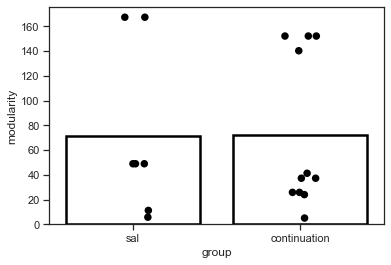

In [105]:
res = df.fillna(0).loc[lambda x: x.sig == True]
sns.barplot(data=res, x="group", y="modularity", ci=None, edgecolor="black", fc="none", linewidth=2.5)

sns.stripplot(data=res, x="group", y="modularity", color="black", linewidth=2.5)

MannwhitneyuResult(statistic=20.0, pvalue=0.051529586727419786)

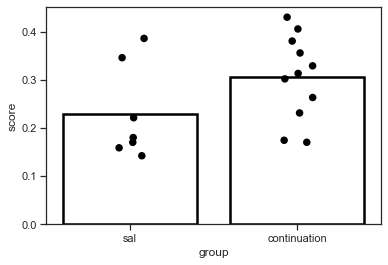

In [22]:
res = df.fillna(0).loc[lambda x: x.sig == True]
sns.barplot(data=res, x="group", y="score", ci=None, edgecolor="black", fc="none", linewidth=2.5)

sns.stripplot(data=res, x="group", y="score", color="black", linewidth=2.5)

x = res.loc[lambda x: x.group == "sal"]["score"]
y = res.loc[lambda y: y.group =="continuation"]["score"]

from scipy.stats import mannwhitneyu

mannwhitneyu(x, y)